<a href="https://colab.research.google.com/github/manavaditya21/Basic-ML-Templates/blob/main/Project_Final_512.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


In [87]:
path="/content/drive/MyDrive/Machine Learning/CH-512/Project/Table - IN_Table.csv.csv"
data= pd.read_csv(path)

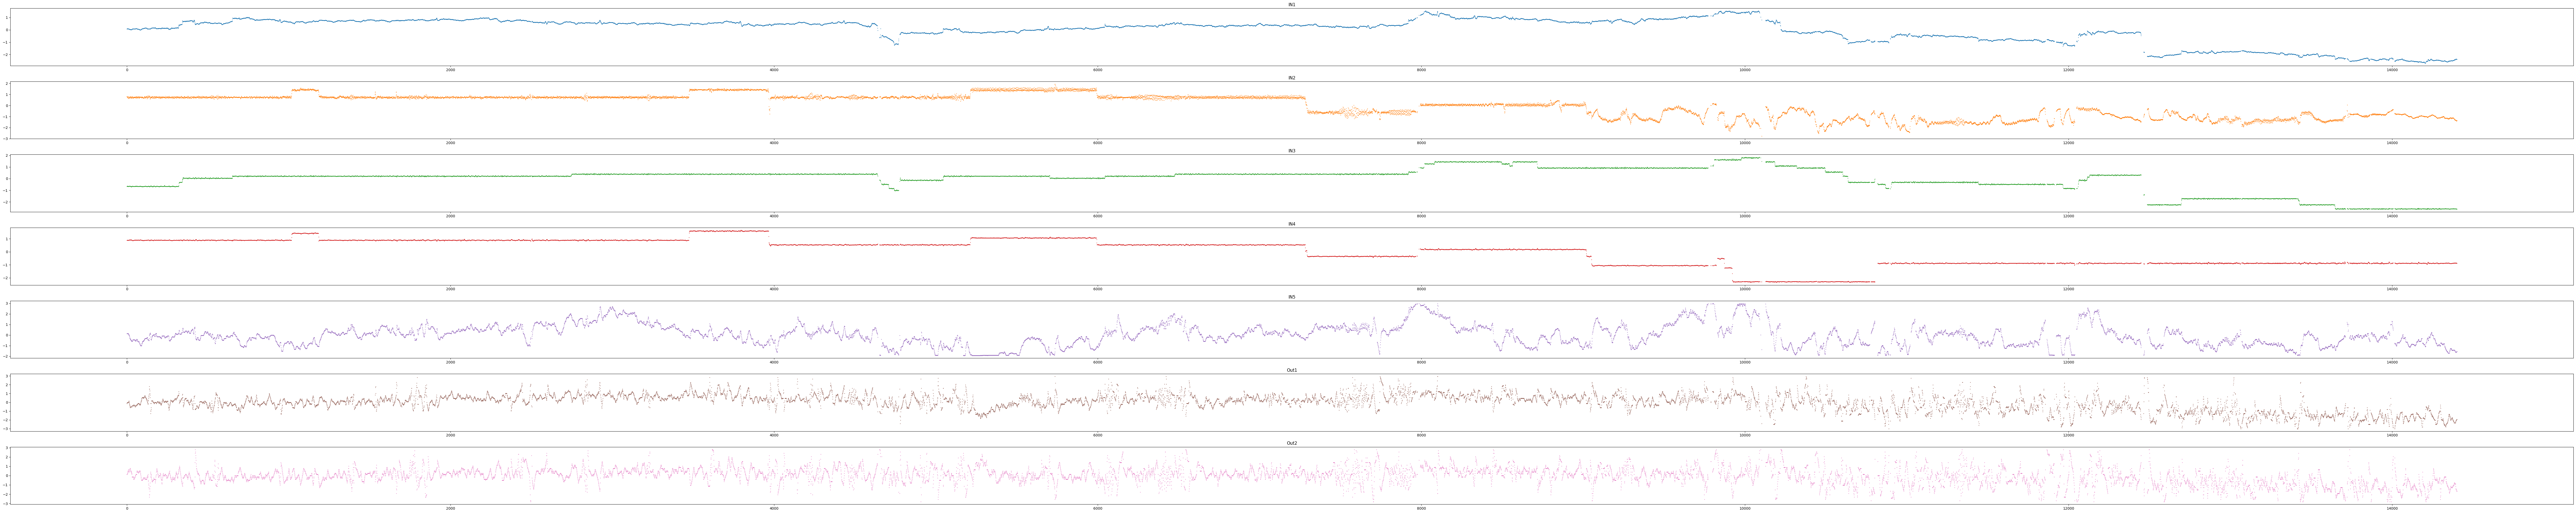

In [107]:
plt.figure(figsize=(100, 20))

for i, col in enumerate(data.columns, start=1):
    plt.subplot(7, 1, i)
    plt.scatter(data.index, data[col], marker='.', color='C{}'.format(i-1),s=2)
    plt.title(col)

plt.tight_layout()

plt.show()

In [89]:
data.corr()

IN1       IN2       IN3       IN4       IN5      Out1      Out2
IN1   1.000000  0.500407  0.924350  0.438273  0.455514  0.624829  0.381853
IN2   0.500407  1.000000  0.321950  0.895081  0.081605  0.388346  0.201564
IN3   0.924350  0.321950  1.000000  0.197927  0.365890  0.572199  0.415136
IN4   0.438273  0.895081  0.197927  1.000000  0.013679  0.301107  0.203665
IN5   0.455514  0.081605  0.365890  0.013679  1.000000  0.428711  0.101761
Out1  0.624829  0.388346  0.572199  0.301107  0.428711  1.000000 -0.151741
Out2  0.381853  0.201564  0.415136  0.203665  0.101761 -0.151741  1.000000

##Removing the outliers


In [108]:
def outlier(data):
    for column in data.columns:
        data[column] = data[column].astype(float)  # Convert column to float type
        mean = np.mean(data[column])
        std_dev = np.std(data[column])
        lower_bound = mean - 3 * std_dev
        upper_bound = mean + 3 * std_dev
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

data_c = outlier(data)
data_c

IN1       IN2       IN3       IN4       IN5      Out1      Out2
0      0.077744  0.795565 -0.665503  0.879321  0.134419 -0.122686  0.123661
1      0.080313  0.824595 -0.655447  0.875636  0.134941 -0.122686  0.123661
2      0.087355  0.776258 -0.650550  0.884105  0.132452 -0.026857  0.123661
3      0.091774  0.739149 -0.644934  0.892043  0.131287 -0.026857  0.251010
4      0.091166  0.761332 -0.648654  0.892752  0.136788 -0.026857  0.251010
...         ...       ...       ...       ...       ...       ...       ...
14396 -2.371841 -1.399878 -2.594168 -0.861832 -1.607387 -2.039274 -1.531870
14397 -2.378745 -1.407683 -2.601522 -0.871577 -1.604817 -2.039274 -1.531870
14398 -2.385070 -1.388787 -2.606594 -0.880330 -1.579605 -1.943445 -1.659219
14399 -2.386119 -1.372492 -2.615738 -0.886744 -1.556761 -1.943445 -1.659219
14400 -2.382557 -1.357018 -2.612316 -0.888799 -1.535844 -1.943445 -1.659219

[13902 rows x 7 columns]

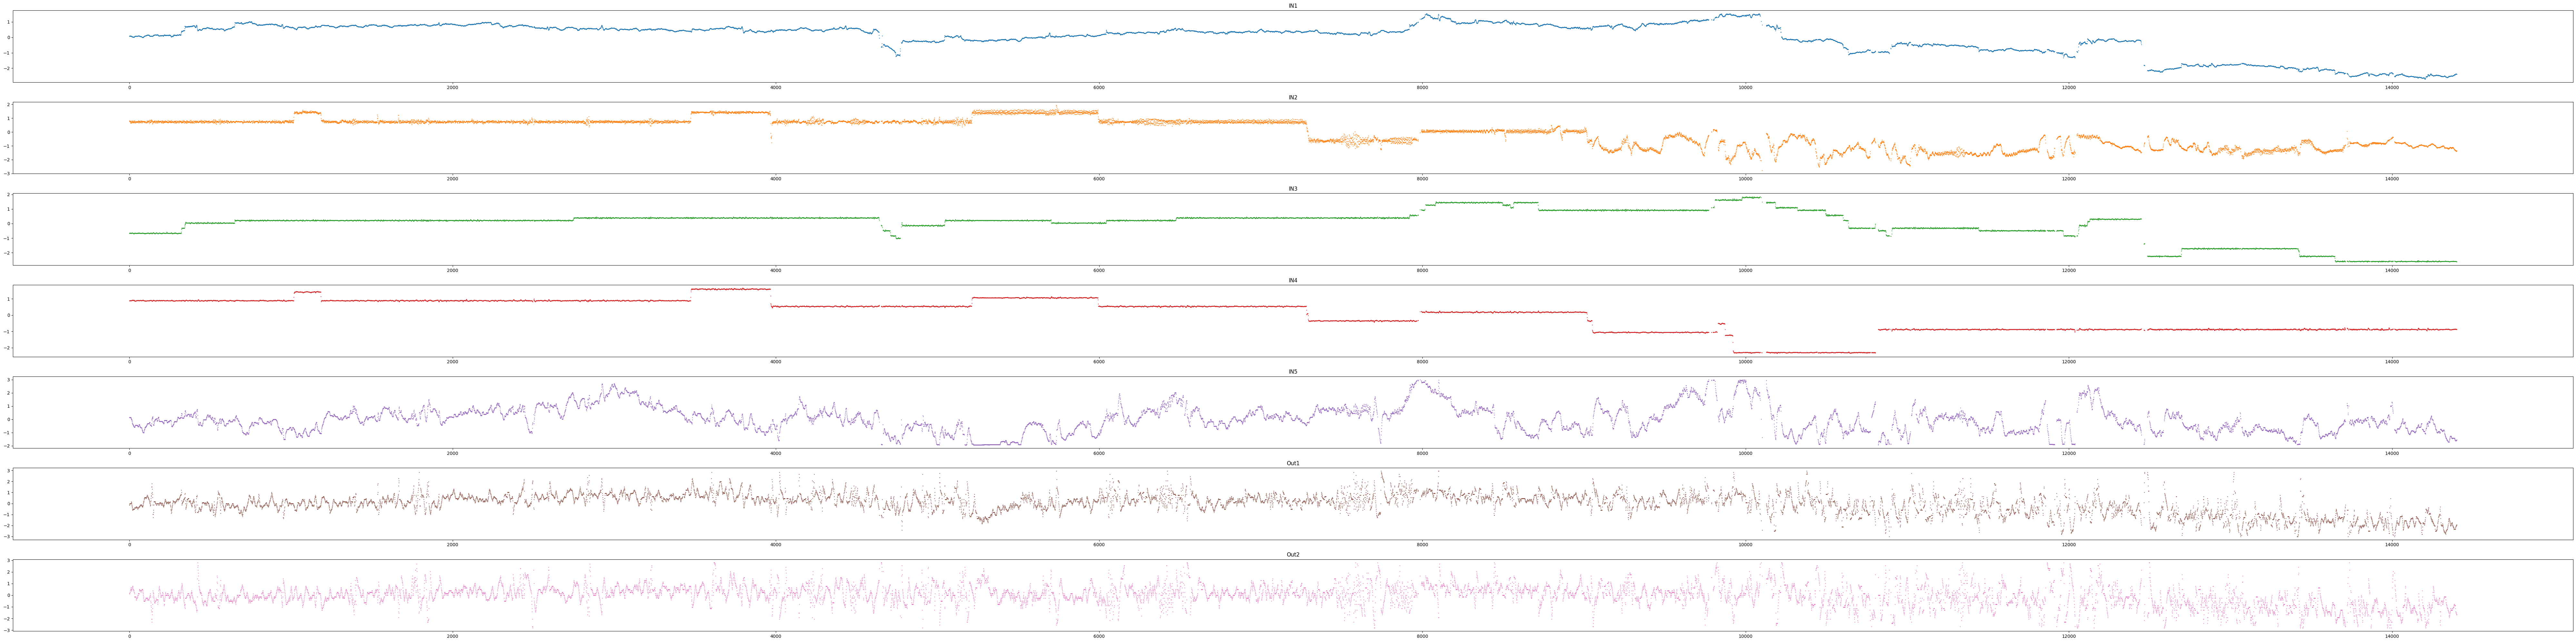

In [94]:
plt.figure(figsize=(80, 20))

for i, col in enumerate(data.columns, start=1):
    plt.subplot(7, 1, i)
    plt.scatter(data_c.index, data_c[col], marker='.', color='C{}'.format(i-1),s=2)
    plt.title(col)

plt.tight_layout()

plt.show()

In [ ]:
data_c.corr()

In [95]:
x  = data_c.loc[:,['IN1','IN2','IN5']]
y1 = data_c.loc[:,'Out1']


#Linear

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y1_train, y1_test = train_test_split(x, y1,test_size=0.2, random_state=42)

IN1       IN2       IN5
11283 -0.524696 -1.427402  0.251449
6620   0.364741  0.709434  0.721739
12801 -1.775256 -1.222002 -0.420743
7295   0.385427 -0.452166 -0.240480
3624   0.541988  1.368355 -0.289540
...         ...       ...       ...
13806 -2.398160 -0.913082 -0.044961
3463   0.394043  0.772697 -0.021916
12797 -1.725296 -0.948411 -0.609919
7091   0.401942  0.698754  0.244423
1899   0.819375  0.654387  0.587084

[2813 rows x 3 columns]

In [118]:
from sklearn.linear_model import LinearRegression
regressor_y1 = LinearRegression()
regressor_y1.fit(x_train, y1_train)

LinearRegression()

In [119]:
y1_test_values = y1_test.values
y1_pred = regressor_y1.predict(x_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1), y1_test_values.reshape(len(y1_test_values),1)),1))

[[-0.4  -0.7 ]
 [ 0.4  -0.31]
 [-1.12 -1.37]
 ...
 [-1.09 -0.41]
 [ 0.32  1.03]
 [ 0.59 -0.31]]


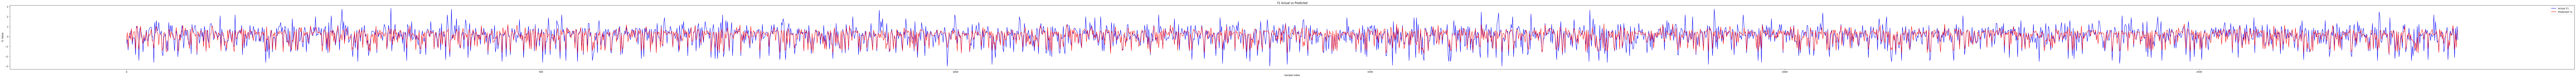

In [122]:
plt.figure(figsize=(200, 5))
plt. plot(range(len(y1_test)), y1_test, color='blue', label='Actual Y1')
plt.plot(range(len(y1_test)), y1_pred, color='red', label='Predicted Y1')
plt.xlabel('Sample Index')
plt.ylabel('Y1 Value')
plt.title('Y1 Actual vs Predicted')
plt.legend()
plt.show()

In [125]:
from sklearn.metrics import r2_score
print('R2=',r2_score(y1_test, y1_pred))

n_samples = len(y1_test)
n_parameters = x_train.shape[1] + 1
n_samples * np.log(np.mean((y1_test - y1_pred) ** 2)) + 2 * n_parameters

R2= 0.485325857005815


-2345.462881069295

#Polynomial

In [127]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(x_poly, y1_train)

LinearRegression()

In [128]:
y1_test_values = y1_test.values
y1_pred = regressor.predict(poly_reg.transform(x_test))
np.set_printoptions(precision=2)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1), y1_test_values.reshape(len(y1_test),1)),1))

[[-0.29 -0.7 ]
 [ 0.43 -0.31]
 [-1.13 -1.37]
 ...
 [-0.75 -0.41]
 [ 0.32  1.03]
 [ 0.42 -0.31]]


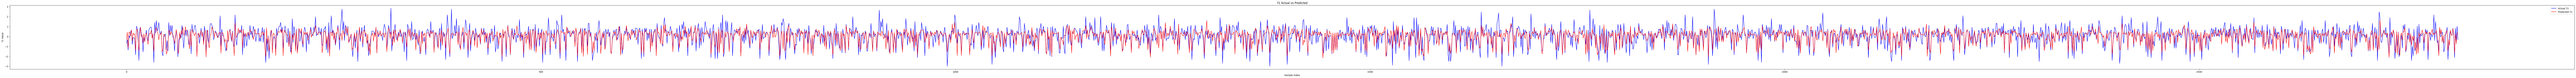

In [129]:
plt.figure(figsize=(200, 5))
plt. plot(range(len(y1_test)), y1_test, color='blue', label='Actual Y1')
plt.plot(range(len(y1_test)), y1_pred, color='red', label='Predicted Y1')
plt.xlabel('Sample Index')
plt.ylabel('Y1 Value')
plt.title('Y1 Actual vs Predicted')
plt.legend()
plt.show()


In [130]:
from sklearn.metrics import r2_score
print("R2=",r2_score(y1_test, y1_pred))

n_samples = len(y1_test)
n_parameters = x_train.shape[1] + 1
n_samples * np.log(np.mean((y1_test - y1_pred) ** 2)) + 2 * n_parameters

R2= 0.5395586482434012


-2658.6861511418483

#Lasso


In [131]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
data = data_c

# Extract features and target variable
X = data['IN1']
y = data['Out1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the 1D arrays to 2D arrays
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Lasso regression model
alpha = 0.1  # Regularization strength
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the coefficients
print("Coefficients:", lasso.coef_)

Mean Squared Error: 0.4332299510020381
Coefficients: [0.53]


In [132]:
print(r2_score(y_test, y_pred))

0.4577308565319985
